<a href="https://colab.research.google.com/github/Dayaanaly/SA-PU4_Modelo_LSTM/blob/main/Copia_de_TL_U4_LSTM_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unidad 4: Long-Short Term Memory**

Sofía Alejandra Aguilar Valdez

21 de octubre de 2022

# Información del estudiante

``NOMBRE:``

``CÓDIGO:``

# **Contenido**

1. **Limitaciones de la RNN** <br>
  1.1. ¿Qué es una RNN? <br>
  1.2. Long-term dependencies problem <br>
  1.3. Limitaciones de una RNN <br>
2. **Long-Short Term Memory (LSTM)** <br>
  2.1. ¿Qué es una red LSTM? <br>
  2.2. Estructura básica <br>
3. **Funcionamiento** <br>
  3.1. Conveyor belt <br>
  3.2. Forget gate <br>
  3.3. Input gate <br>
  3.4. Output gate <br>
4. **Resúmenes** <br>
5. **Glosario**<br>
6. **Referencias**<br>

En esta unidad hay **dos actividades** complementarias:
1. Hacer dos resúmenes: uno técnico y otro en lenguaje común.
2. Hacen un glosario.

# **1. Limitaciones de la RNN**

## 1.1. ¿Qué es una RNN?

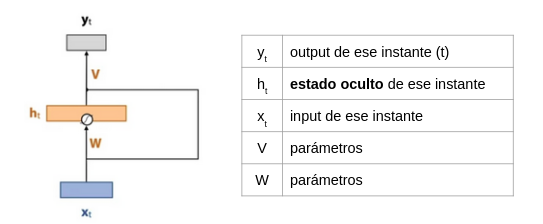

* Un tipo de ANN que emplea la **recurrencia** en una de sus capas [1].
* Todas las RNNs tienen al menos  **un ciclo** [2].
* Para calcular el ``output`` de cada instante, se utiliza el **estado oculto** inmediato anterior:

<center>$h_{t} = σ(W\begin{bmatrix}
x_{t}\\
h_{t-1}
\end{bmatrix}+b)$

$y_{t} = Vh + c$ 
</center>

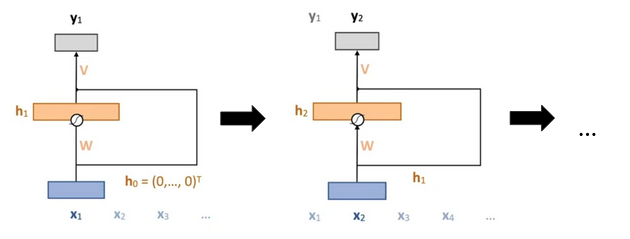

## 1.2. Long-term dependencies problem

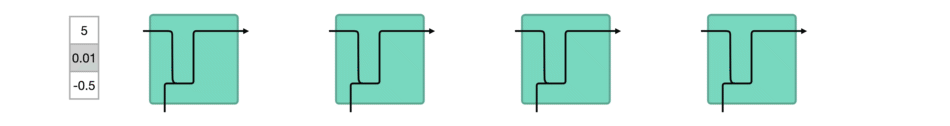

* Los vectores se transforman varias veces al fluir en una red neuronal. En la imagen se observa lo que sucede cuando los valores son continuamente multiplicados por 3 [3]:
  1. Algunos se incrementan muy rápido (**exploding gradients**).
  2. Otros a su vez se vuelven insignificantes (**vanishing gradients**). 

## 1.3. Limitaciones de una RNN

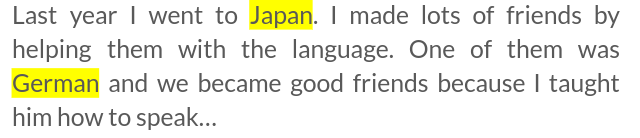

* Para largas secuencias, una RNN difícilmente llevará la información de los primeros instantes a los últimos [3].

* Las RNNs "olvidan" la información de los primeros instantes de la secuencia.

* Las RNNs tienen **memoria de corto plazo** (*short-term memory*).

# **2. Long-Short Term Memory (LSTM)** 

## 2.1. ¿Qué es una red LSTM? 

* Una RNN con **mecanismos selectivos** para recordar y olvidar información [4].
* Estos mecanismos son controlados por compuertas aprendibles (**learnable gates**).

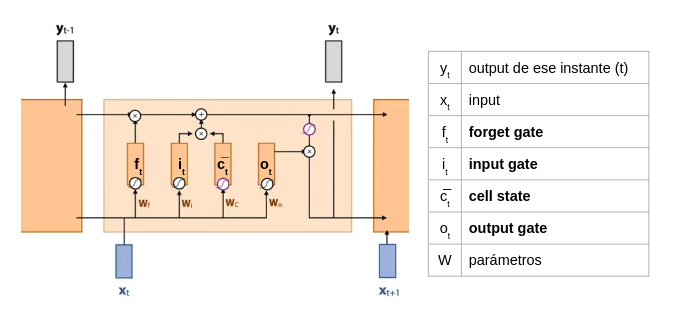

→ Los símbolos $⊕$ y $⊗$ representan **adición y multiplicación vectorial**.

→ Las redes LSTM utilizan dos tipos de activación: **sigmoide** (0→1) e **hiperbólica tangente** (-1→1).

→ El símbolo $c̅$ significa valores candidatos para el **cell state** $c$. 

## 2.2. Estructura básica

* Para cada instante de la secuencia se calcula una **celda**.

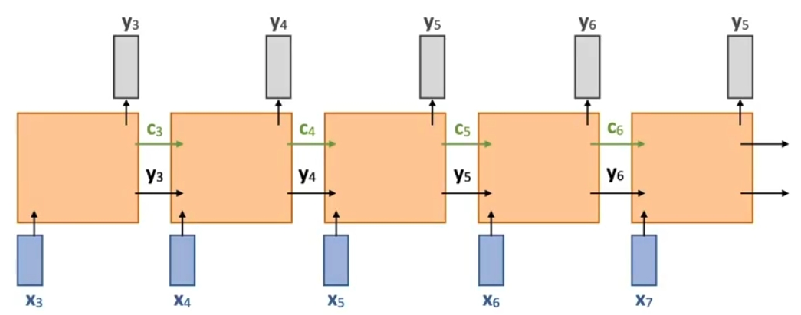

→ ¿Cómo fluye la información en una red LSTM?

# **3. Funcionamiento**

## 3.1. Conveyor belt

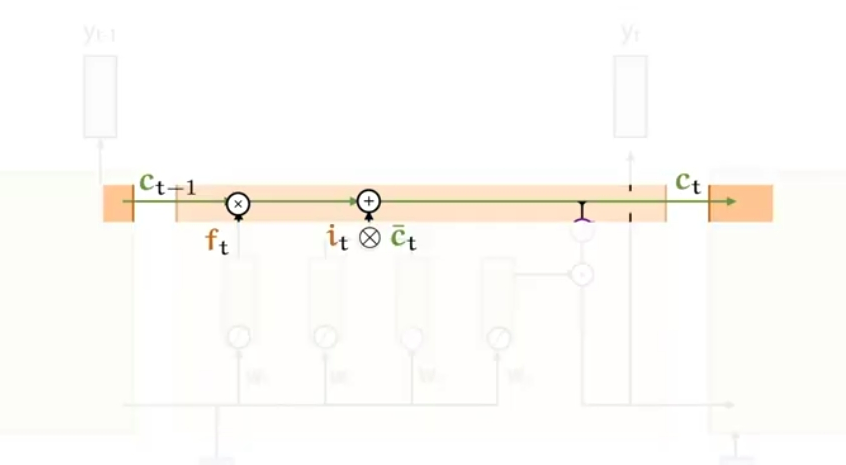

* Es una cinta donde se transforma el **cell state** [4]:

<center>$c_{t-1} → c_{t}$</center>

* Se calcula de la siguiente manera:

<center>$c_{t} = c_{t-1} ⊗ f_{t} ⊕ (i_{t} ⊗ c̅_{t})$</center>

* Dado que no hay activaciones en esta cinta, se obtienen **non-vanishing gradients**. 

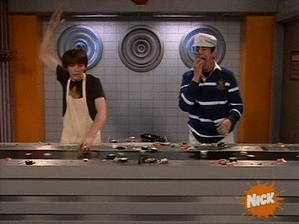

## 3.2. Forget gate

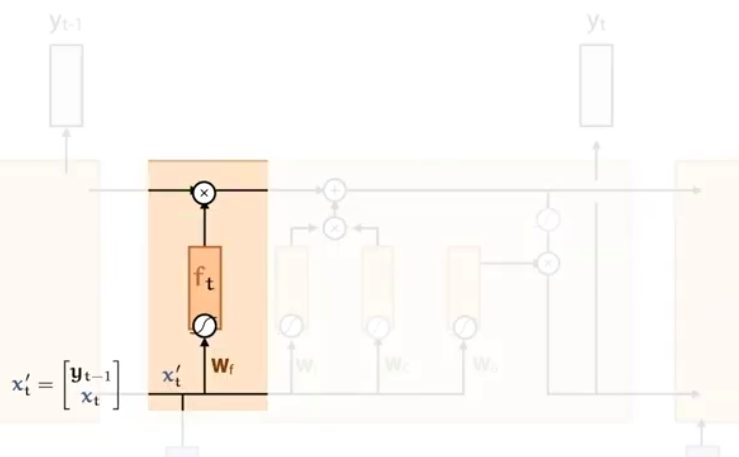

* Se calcula de la siguiente manera [4]:

<center> 
$x'_{t} = \begin{bmatrix}
y_{t-1}\\
x_{t}
\end{bmatrix}$

$f_{t} = σ_{s}(W_{f}x'_{t}+b_{f})$
</center>

* Utiliza la **función sigmoide** ya que cualquier número al multiplicarse por 0 da 0. Esto hace que los valores con activación baja desaparezcan y se *olviden* [3].

* Hace espacio en la memoria cuando no hay información entrante importante.

* Una vez que se hace espacio en la memoria, se necesita definir qué se va a añadir (**input gate**).

* $x'_{t}$ también se representa con $h_{t}$ ya que funciona como un **estado oculto**.

* El estado oculto contiene información de instantes anteriores de la secuencia [3].

## 3.3. Input gate

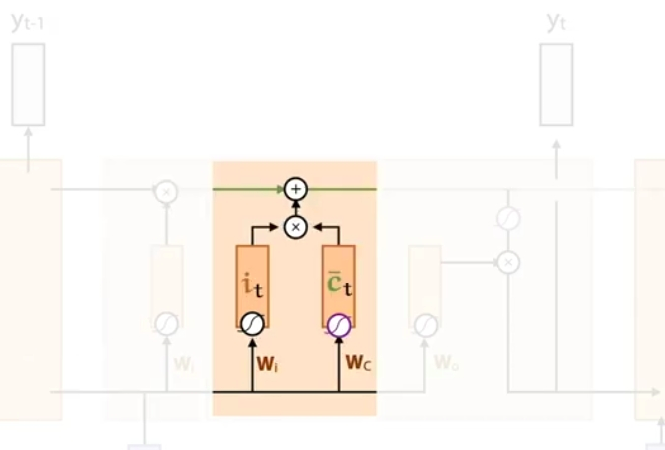

* Se calcula de la siguiente manera [4]:

<center>
$i_{t} = σ_{s}(W_{i}x'_{t}+b_{i})$

$c̅_{t} = tanh(W_{c}x'_{t}+b_{c})$
</center>

* *función tanh** obtiene valores mientras que la **sigmoide** trabaja como una **máscara** que controla en qué magnitud esos valores afectarán los resultados finales.

* Los valores $c̅_{t}$ son los que **se quieren añadir** al conveyor belt.

* Los valores $i_{t}$ son los que **identifican qué se añade** al conveyor belt.

→ Si todos los valores de $i_{t}$ son cercanos a 1, todos los valores de $c̅_{t}$ serán añadidos al conveyor belt. 

→ La adición ($⊕$) del producto $σ(input) ⊗ tanh(input)$ se conoce como **gate**. Este mecanismo es común en otras arquitecturas. 

## 3.4. Output gate

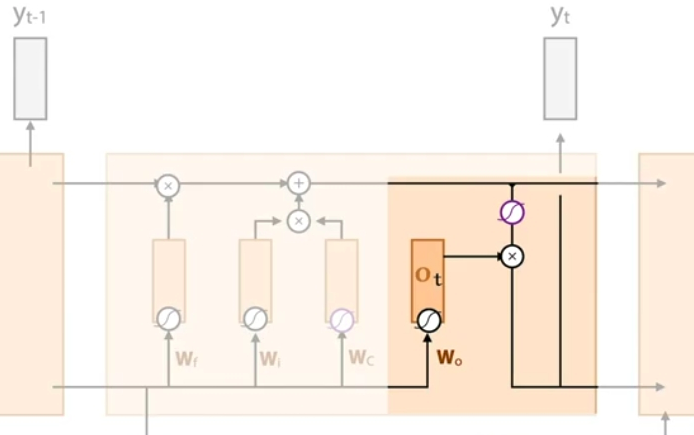

* Se calcula de la siguiente manera [3,4]:

<center> 
$o_{t} = σ_{s}(W_{o}x'_{t}+b_{o})$
</center>

> 1. Se evalúa $x'_{t}$ (el estado oculto anterior y el input actual) con una función sigmoide.
> 2. Se evalúa el **cell state modificado** $c_{t}$ con una función tanh.
> 3. Se multiplica el output de la función tanh por el de la función sigmoide para identificar qué información se añade al **hidden state**.
> 4. El producto es el hidden state.

* Los valores $o_{t}$ identifican qué se añade al siguiente **hidden state**.

* Los nuevos **cell state** ($c_{t}$) y **hidden state** ($y_{t}$) se envían al siguiente instante de la secuencia.

# **4. Character-level language modeling in PyTorch**

El **modelado del lenguaje** es una aplicación de las redes neuronales para desempeñar tareas asociadas con los lenguajes humanos, e.g., la generación de oraciones en inglés [6]. 

En este ejemplo, el input es un documento y el objetivo es desarrollar un modelo que genere nuevo texto con un estilo similar.

En el *character-level language modeling*, el input es descompuesto en una secuencia de caracteres para alimentar a la red un caracter a la vez. De esta manera, la red procesará cada nuevo caracter junto a la memoria de los caracteres antes vistos con el fin de predecir el siguiente.

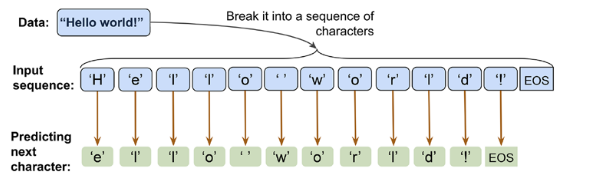

## **Contenido**



1.   Resumen
2.   Marco teórico
3.   Objetivos
4.   Materiales y métodos
5.   Resultados
6.   Discusión
7.   Conclusiones
8.   Referencias



# **1. Resumen**
La inteligencia artificial (IA) nació en la década de los 50´s denominada en un principio como la ciencia de e ingenio de hacer máquinas inteligentes, especialmente programas de cálculo inteligente, en la actualidad se describe como el proceso de automatizar las tareas intelectuales que son realizadas por los seres humanos. El Deep Learning o Aprendizaje Profundo que es el objetivo principal de nuestra asignatura es una rama de la inteligencia artificial que se basa en un subconjunto de algoritmos de aprendizaje automático los cuales intentan modelar niveles altos de abstracción en los datos. El tema de este trabajo, Las LSTM (Long Short Term Memory) el cual es un modelo similar a las ya aplicadas en prácticas anteriores, las redes neuronales recurrentes, las LSTM nos ofrecen cierta ventaja frente a las antes mencionadas debido a que son capaces de “recordar” datos relevantes en las secuencias. Para la implementación de del modelo se hizo uso de Project Gutenberg para poder obtener el libro “Frankenstein” y a partir del mismo poder generar una red LSTM capaz de predecir texto en base a secuencias del libro.


# **2. Marco Teórico**


# **3. Objetivos**


# **4. Materiales y métodos**


# **5. Resultados**


# **6. Discución**


# **7. Conclusiones**


## 4.1. Preparing the data

In [ ]:
from bs4 import BeautifulSoup
from traitlets.utils import text
import requests

In [ ]:
# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Read .txt file
import numpy as np
#filepath = "/content/drive/MyDrive/🚀-DL-workshop-22B/U4 - LSTM/data/84-0.txt"
#with open(filepath, 'r', encoding="utf8") as fp:
  #text=fp.read()

url= 'https://www.gutenberg.org/cache/epub/42324/pg42324.txt' #Url
book=requests.get(url) 
soup=BeautifulSoup(book.text,'html.parser')
text=soup.get_text() #Generate the text


In [ ]:
start_indx = text.find('START OF THIS PROJECT GUTENBERG EBOOK FRANKENSTEIN')
end_indx = text.find('END OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN')


In [ ]:
text = text[start_indx:end_indx]
char_set = set(text)

In [ ]:
print('Total Length:', len(text))
print('Unique Characters:', len(char_set))

Total Length: 465109
Unique Characters: 90


- La secuencia consiste de 419,402 caracteres en total y 84 caracteres únicos.
- Para convertir la secuencia en una representación numérica, se creará un diccionario llamado ``char2int``.

In [ ]:
# Sequence mapping: characters to integers and viceversa
chars_sorted = sorted(char_set)
char2int = {ch:i for i,ch in enumerate(chars_sorted)}
char_array = np.array(chars_sorted)
text_encoded = np.array(
    [char2int[ch] for ch in text],
    dtype=np.int32
)

In [ ]:
chars_sorted

['\n',
 '\r',
 ' ',
 '!',
 '"',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'æ',
 'è',
 'é',
 'ê',
 'ô']

In [ ]:
type(text_encoded)

numpy.ndarray

In [ ]:
text_encoded

array([48, 49, 30, ..., 77, 14,  1], dtype=int32)

In [ ]:
print('Text encoded shape:', text_encoded.shape)
print(text[:15], '== Encoding ==>', text_encoded[:15])
print(text_encoded[15:21], '== Reverse ==>',
      ''.join(char_array[text_encoded[15:21]]))

Text encoded shape: (465109,)
START OF THIS P == Encoding ==> [48 49 30 47 49  2 44 35  2 49 37 38 48  2 45]
[47 44 39 34 32 49] == Reverse ==> ROJECT


In [ ]:
# Print the mappings for the first 5 characters in this array
for ex in text_encoded[:5]:
  print('{} -> {}'.format(ex, char_array[ex]))

48 -> S
49 -> T
30 -> A
47 -> R
49 -> T


- Para generar nuevo texto, el objetivo es diseñar un modelo que pueda **predecir el siguiente caracter** según una secuencia dada. 
- Dicha secuencia, el input, representa un **texto incompleto**.
- Dado que tenemos 84 caracteres únicos, este problema puede abordarse como una **tarea de clasificación múltiple**.

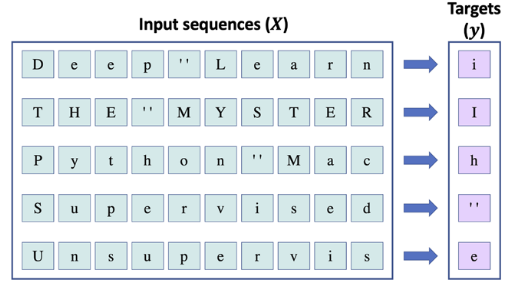

In [ ]:
# Send encoded text to Dataset PyTorch class
import torch
from torch.utils.data import Dataset
seq_length = 180 # fixed sequence length
chunk_size = seq_length + 1
text_chunks = [text_encoded[i:i+chunk_size] 
               for i in range(len(text_encoded)-chunk_size)]

class TextDataset(Dataset):
  def __init__(self, text_chunks):
    self.text_chunks = text_chunks

  def __len__(self):
    return len(self.text_chunks)

  def __getitem__(self, idx):
    text_chunk = self.text_chunks[idx]
    return text_chunk[:-1].long(), text_chunk[1:].long()

seq_dataset = TextDataset(torch.tensor(text_chunks))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


In [ ]:
for i, (seq, target) in enumerate(seq_dataset):
  print(' Input (x): ',
    repr(''.join(char_array[seq])))
  print('Target (y): ',
    repr(''.join(char_array[target])))
  print()
  if i == 1:
    break

 Input (x):  'START OF THIS PROJECT GUTENBERG EBOOK FRANKENSTEIN ***\r\n\r\n\r\n\r\n\r\nProduced by Greg Weeks, Mary Meehan and the Online\r\nDistributed Proofreading Team at http://www.pgdp.net\r\n\r\n\r\n\r\n\r\n\r\n'
Target (y):  'TART OF THIS PROJECT GUTENBERG EBOOK FRANKENSTEIN ***\r\n\r\n\r\n\r\n\r\nProduced by Greg Weeks, Mary Meehan and the Online\r\nDistributed Proofreading Team at http://www.pgdp.net\r\n\r\n\r\n\r\n\r\n\r\n\r'

 Input (x):  'TART OF THIS PROJECT GUTENBERG EBOOK FRANKENSTEIN ***\r\n\r\n\r\n\r\n\r\nProduced by Greg Weeks, Mary Meehan and the Online\r\nDistributed Proofreading Team at http://www.pgdp.net\r\n\r\n\r\n\r\n\r\n\r\n\r'
Target (y):  'ART OF THIS PROJECT GUTENBERG EBOOK FRANKENSTEIN ***\r\n\r\n\r\n\r\n\r\nProduced by Greg Weeks, Mary Meehan and the Online\r\nDistributed Proofreading Team at http://www.pgdp.net\r\n\r\n\r\n\r\n\r\n\r\n\r\n'



In [ ]:
# Define DataLoaders
from torch.utils.data import DataLoader
batch_size = 64
torch.manual_seed(1)
seq_dl = DataLoader(seq_dataset, batch_size=batch_size,
                    shuffle=True, drop_last=True)

## 4.2. Building the model

### LSTM Model

In [ ]:
# LSTM model definition
import torch.nn as nn
class RNN(nn.Module):
  def __init__(self, vocab_size, embed_dim, rnn_hidden_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, embed_dim)
    self.rnn_hidden_size = rnn_hidden_size
    #self.rnn = nn.RNN(input_size, hidden_size, num_layers=2, batch_first=True)
    self.rnn = nn.LSTM(embed_dim, rnn_hidden_size,
                       batch_first=True)
    self.fc = nn.Linear(rnn_hidden_size, vocab_size)

  def forward(self, x, hidden, cell):
    out = self.embedding(x).unsqueeze(1)
    out, (hidden, cell) = self.rnn(out, (hidden, cell))
    out = self.fc(out).reshape(out.size(0), -1)
    return out, hidden, cell

  def init_hidden(self, batch_size):
    hidden = torch.zeros(1, batch_size, self.rnn_hidden_size)
    cell = torch.zeros(1,batch_size, self.rnn_hidden_size)
    return hidden, cell

In [ ]:
# Model instantiation
vocab_size = len(char_array)
embed_dim = 256
rnn_hidden_size = 512
torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size).cuda()
model

RNN(
  (embedding): Embedding(90, 256)
  (rnn): LSTM(256, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=90, bias=True)
)

### Training

In [ ]:
# Training criterions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training
from tqdm import tqdm

num_epochs = 100000 #10000 -- Sofi
torch.manual_seed(1)
for epoch in tqdm(range(num_epochs)):
  hidden, cell = model.init_hidden(batch_size)
  hidden = hidden.cuda()
  cell = cell.cuda()
  seq_batch, target_batch = next(iter(seq_dl))
  seq_batch = seq_batch.cuda()
  target_batch = target_batch.cuda() 
  optimizer.zero_grad()
  loss = 0
  for c in range(seq_length):
    pred, hidden, cell = model(seq_batch[:, c], hidden, cell)
    loss += loss_fn(pred, target_batch[:, c])
  loss.backward()
  optimizer.step()
  loss = loss.item()/seq_length
  if epoch % 500 == 0:
    print(f'Epoch {epoch} loss: {loss:.4f}')

  0%|          | 1/100000 [00:01<36:50:26,  1.33s/it]

Epoch 0 loss: 4.5096


  1%|          | 501/100000 [02:00<6:21:31,  4.35it/s]

Epoch 500 loss: 1.3647


  1%|          | 1001/100000 [03:57<6:34:28,  4.18it/s]

Epoch 1000 loss: 1.1769


  1%|▏         | 1364/100000 [05:21<6:19:45,  4.33it/s]

### Evaluation

In [ ]:
from torch.distributions.categorical import Categorical
torch.manual_seed(1)
logits = torch.tensor([[1.0, 1.0, 1.0]])
print('Probabilities:',
      nn.functional.softmax(logits, dim=1).numpy()[0])
m = Categorical(logits=logits)
samples = m.sample((10,))
print(samples.numpy())

In [ ]:
torch.manual_seed(1)
logits = torch.tensor([[1.0, 1.0, 3.0]])
print('Probabilities:', nn.functional.softmax(logits, dim=1).numpy()[0])
m = Categorical(logits=logits)
samples = m.sample((10,))
print(samples.numpy())

In [ ]:
#Create BLEU evaluation function
import nltk.translate.bleu_score as bleu
def bleu_score(model, text, char_array, seq_length, device):
    model.eval()
    hidden, cell = model.init_hidden(1)
    hidden = hidden.to(device)
    cell = cell.to(device)
    text = text.lower()
    text_encoded = np.array(
        [char2int[ch] for ch in text],
        dtype=np.int32
    )
    text_chunks = [text_encoded[i:i+seq_length] 
                     for i in range(len(text_encoded)-seq_length)]
    text_chunks = torch.tensor(text_chunks).to(device)
    with torch.no_grad():
        for c in range(seq_length):
        pred, hidden, cell = model(text_chunks[:, c], hidden, cell)
    pred = pred.cpu().numpy()
    pred = np.argmax(pred, axis=1)
    pred = ''.join(char_array[pred])
    print('Input text:', text)
    print('Predicted text:', pred)
    print('BLEU score:', bleu.sentence_bleu([text], pred))

In [ ]:
#Create a ROUGE evaluation function
from rouge import Rouge
def rouge_score(model, text, char_array, seq_length, device):
    model.eval()
    hidden, cell = model.init_hidden(1)
    hidden = hidden.to(device)
    cell = cell.to(device)
    text = text.lower()
    text_encoded = np.array(
        [char2int[ch] for ch in text],
        dtype=np.int32
    )
    text_chunks = [text_encoded[i:i+seq_length] 
                     for i in range(len(text_encoded)-seq_length)]
    text_chunks = torch.tensor(text_chunks).to(device)
    with torch.no_grad():
        for c in range(seq_length):
        pred, hidden, cell = model(text_chunks[:, c], hidden, cell)
    pred = pred.cpu().numpy()
    pred = np.argmax(pred, axis=1)
    pred = ''.join(char_array[pred])
    print('Input text:', text)
    print('Predicted text:', pred)
    rouge = Rouge()
    scores = rouge.get_scores(pred, text)
    print('ROUGE score:', scores)
        

### Save model

In [ ]:
torch.save(model, 'model.pt')

## 4.3. Performing next-character prediction

In [ ]:
def sample(model, starting_str,len_generated_text=500,scale_factor=1.0):

  encoded_input = torch.tensor([char2int[s] for s in starting_str]).cuda()
  encoded_input = torch.reshape(encoded_input, (1, -1)).cuda()
  generated_str = starting_str
  model
  model.eval()

  hidden, cell = model.init_hidden(1)
  hidden = hidden.cuda()
  cell = cell.cuda()
  for c in range(len(starting_str)-1):
    _, hidden, cell = model(encoded_input[:, c].view(1), hidden, cell)
  hidden = hidden.cuda()
  cell = cell.cuda()
  last_char = encoded_input[:, -1]
  last_char = last_char.cuda()
  
  for i in range(len_generated_text):
    logits, hidden, cell = model(last_char.view(1), hidden, cell)
    logits = logits.cuda()
    logits = torch.squeeze(logits, 0)
    scaled_logits = logits * scale_factor
    m = Categorical(logits=scaled_logits)
    last_char = m.sample()
    generated_str += str(char_array[last_char])
  
  return generated_str

In [ ]:
torch.manual_seed(1)
print(sample(model, starting_str='A man'))

# **4. Resúmenes**

```ACTIVIDAD 1:``` Explica el funcionamiento de las redes LSTM en dos resúmenes: uno técnico y otro para personas no especializadas en el tema.

## Técnico

## Lenguaje común

# **5. Glosario**

```ACTIVIDAD 2:``` Haz un glosario para los conceptos principales de la unidad.

# **6. Referencias** 
[1] Ketkar, N., & Moolayil, J. (2021). Deep learning with Python: learn best practices of deep learning models with PyTorch. Apress.

[2] DLVU. (2020). Lecture 5.2 Recurrent Neural Networks. YouTube. Retrieved September 30, 2022, from https://www.youtube.com/watch?v=2JGlmBhQedk&list=PLIXJ-Sacf8u7756f8QFM_FNZQxdJov8f4&index=2

[3] Phi, M. (2020). Illustrated Guide to LSTM’s and GRU’s: A step by step explanation. Medium. Recuperado 20 de octubre de 2022, de https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

[4] DLVU. (2020). Lecture 5.3 Long short-term memory (DLVU). YouTube. Recuperado 20 de octubre de 2022, de https://www.youtube.com/watch?v=fbTCvvICk8M&feature=youtu.be

[5] Understanding LSTM Networks -- colah’s blog. (s. f.). Recuperado 21 de octubre de 2022, de https://colah.github.io/posts/2015-08-Understanding-LSTMs/

[6] Raschka, S., Liu, Y., Dzhulgakov, D., & Mirjalili, V. (2022). Machine Learning with Pytorch and Scikit-Learn: Develop Machine Learning and Deep Learning Models with Python. Van Haren Publishing.

[7] Saving and Loading Models — PyTorch Tutorials 1.12.1+cu102 documentation. (n.d.). Retrieved October 27, 2022, from https://pytorch.org/tutorials/beginner/saving_loading_models.html